# Sobel_IP Notebook
Sobel_Split.py library location: \xilinx\pynq\lib

Sobel_IP.bit location: \xilinx\pynq\overlays\base

In this notebook, several filters will be applied to HDMI input stream. Those input sources and applied filters will then be displayed on a HDMI output.

# Load the overlay

In [9]:
from pynq import Overlay
from pynq.lib.video import *
from pynq.lib.Sobel_Split import *
from IPython.display import Image

base = Overlay("/home/xilinx/pynq/overlays/base/Sobel_IP.bit")
base.download()

Sobel_ip = Sobel_Split()

## Initialize HDMI

In [10]:
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out
hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

## Initialize Constants

In [11]:
RGB = 0
GRAY = 1
RGB_GRAY = 2
BLACK = 3
RGB_BLACK = 4
BLACK_GRAY = 5

## Tie HDMI and initialize sobel sobelSplit

In [12]:
hdmi_in.tie(hdmi_out)
Sobel_ip.sobelSplit()

### Presets

Image sharpening: Sobel_ip.imageSharpening()

Sobel Split: Sobel_ip.sobelSplit()


In [13]:
Sobel_ip.imageSharpening()

In [14]:
Sobel_ip.sobelSplit()

### changing color mode and intensity

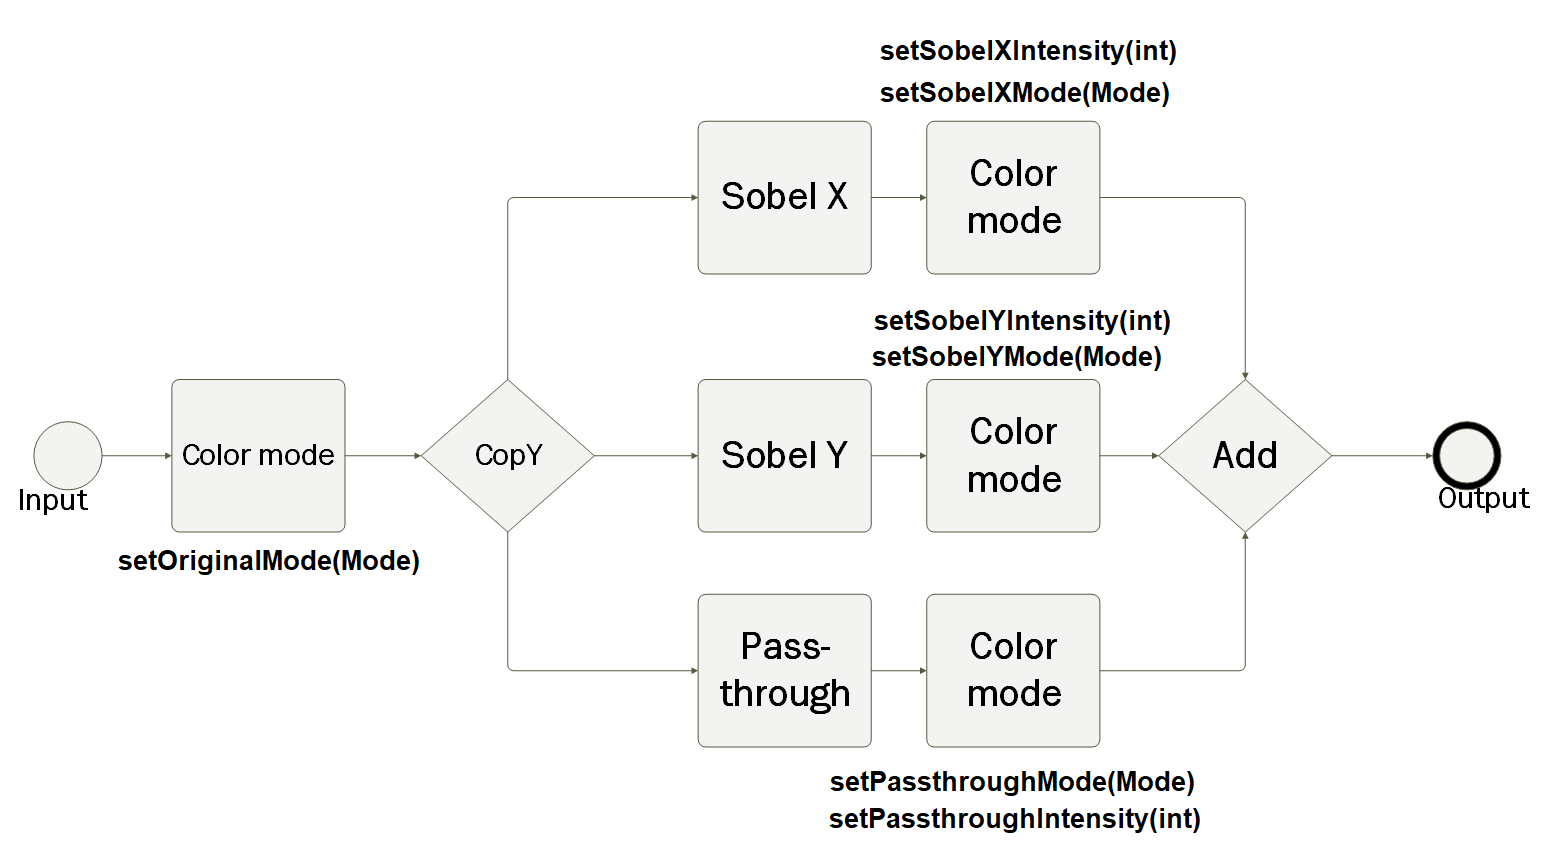

In [15]:
Image("/home/xilinx/Dataflow.png")

This picture explains where the you can modify the frames. 

The intensity functions lower the intensity, for example: setSobelXIntensity(3) lowers the Sobel X frame by 3.

The Mode functions change the color mode of the frame.

- RGB: Unchanged frame
- GRAY: Convert to grayscale
- RGB_GRAY = Split: half unchanged, half grayscale
- BLACK: Full black frame
- RGB_BLACK: half unchanged, half black
- BLACK_GRAY: half black, half grayscale

### Demo:

In [16]:
import time
time.sleep(10) 
Sobel_ip.setSobelXMode(BLACK)
Sobel_ip.setSobelYMode(BLACK)
Sobel_ip.setOriginalMode(RGB)
Sobel_ip.setPassthroughMode(RGB)
time.sleep(10) 
Sobel_ip.setSobelXMode(BLACK)
Sobel_ip.setSobelYMode(BLACK)
Sobel_ip.setOriginalMode(RGB)
Sobel_ip.setPassthroughMode(GRAY)
time.sleep(10) 
Sobel_ip.setSobelXIntensity(1)
Sobel_ip.setSobelYIntensity(1)
Sobel_ip.setSobelXMode(GRAY)
Sobel_ip.setSobelYMode(BLACK)
Sobel_ip.setOriginalMode(RGB)
Sobel_ip.setPassthroughMode(BLACK)
time.sleep(8) 
Sobel_ip.setSobelXMode(BLACK)
Sobel_ip.setSobelYMode(GRAY)
Sobel_ip.setOriginalMode(RGB)
Sobel_ip.setPassthroughMode(BLACK)
time.sleep(8) 
Sobel_ip.setSobelXMode(GRAY)
Sobel_ip.setSobelYMode(GRAY)
Sobel_ip.setOriginalMode(RGB)
Sobel_ip.setPassthroughMode(BLACK)
time.sleep(10) 
Sobel_ip.imageSharpening()
Sobel_ip.setSobelXIntensity(2)
Sobel_ip.setSobelYIntensity(2)

### check frame rate

In [17]:
import  numpy  as  np
import  cv2
numframes = 600
start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))
hdmi_in.tie(hdmi_out)

Frames per second:  59.9266901380781


### Release HDMI

In [18]:
hdmi_out.close()
hdmi_in.close()